In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
wine = pd.read_csv('/content/drive/MyDrive/wine_test.csv')
wine

,Unnamed: 0,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,1,NaN,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


1. alcohol : 알코올 도수
2. malic_acid : 말산(사과산이라 불리며 좋은 향이 남)
3. ash : 회분
4. alcalinity_of_ash : 회분의 알칼리도
5. magnesium : 마그네슘
6. total_phenols : 와인의 색상과 맛에 영향을 미치는 중요한 화합물인 페놀의 총량
7. flavanoids	: 플라보노이드 폴리페놀, 포도의 껍질과 씨앗에서 추출됨, 와인의 맛과 향을 개선시키는데 기여
8. nonflavanoid_phenols : 비-폴라보노이드 
9. proanthocyanins : 프로안토시아닌, 와인의 맛과 향, 색상을 결정함, 농도가 진함과 색상이 비례함
10. color_intensity : 색상의 강도
11. hue : 와인의 색조를 나타내는 지표
12. od280/od315_of_diluted_wines : 희석 와인의 OD280/OD315 비율
13. Proline : 프롤린, 와인 안에 존재하는 아미노산 중 하나로 산화에 대한 내성을 높이는데 영향을 끼침

- wine 데이터 셋의 상관관계 알아보기

In [3]:
w = wine.corr()

<Axes: >

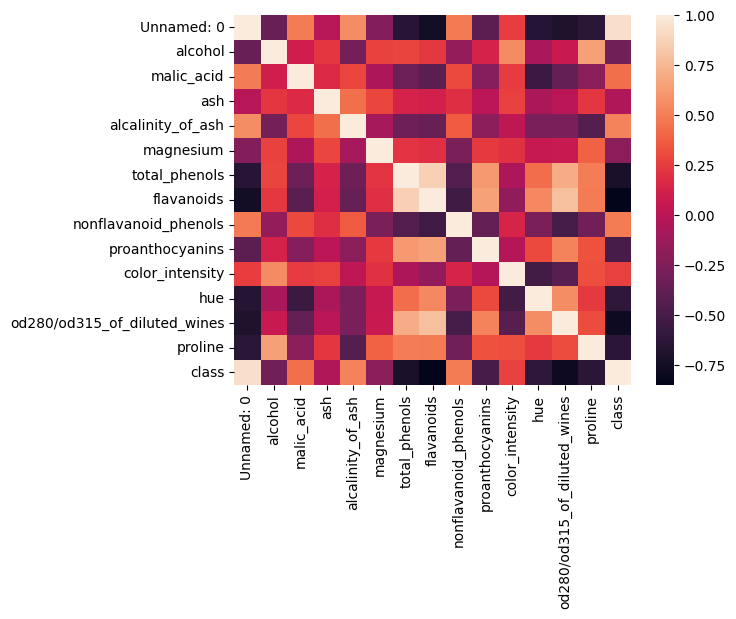

In [4]:
sns.heatmap(w)

alcohol의 경우 malic_acid, ash, alcalinity_of_asch, magnesium, total_phenols, flavonoids, proanthocyanins, color_intensity, proline과 관계 높다.

- 클래스별 알코올 평균

In [5]:
#결측치 확인
wine['alcohol'].isnull().sum()

2

In [6]:
#결측값 있는 행 확인
wine[wine.alcohol.isnull()]

,Unnamed: 0,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
1,1,NaN,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
8,8,NaN,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,0


In [7]:
#결측값 뒷 행의 값으로 채우기
wine = wine.fillna(method='ffill')

In [8]:
wine['alcohol'].isnull().sum()

0

In [9]:
#class별 alcohol 평균
alcohol = wine.groupby(['class'])['alcohol'].mean()
alcohol.to_frame()

,alcohol
class,
0,13.749153
1,12.278732
2,13.153750


([<matplotlib.patches.Wedge at 0x7fea43cbb1c0>,
 [Text(0.4965914828472135, 0.9815278392198593, 'Class0'),
  Text(-1.0987467631452137, -0.052493337462156286, 'Class1'),
  Text(0.5428653254048509, -0.9567116799083648, 'Class2')],
 [Text(0.2708680815530255, 0.5353788213926505, '35.1%'),
  Text(-0.5993164162610256, -0.028632729524812515, '31.3%'),
  Text(0.2961083593117368, -0.5218427344954717, '33.6%')])

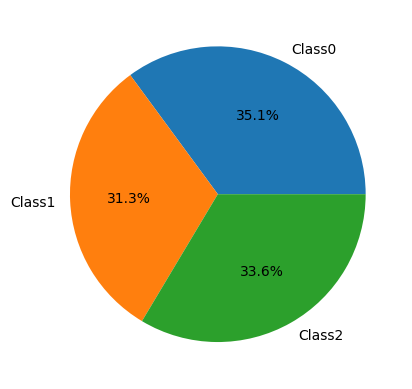

In [10]:
labels = ['Class0','Class1','Class2']
plt.pie(alcohol, labels = labels, autopct='%.1f%%')

###alchol을 기준으로 각각의 화학성분에 대해 class가 어떻게 분포하고 있는지 비교

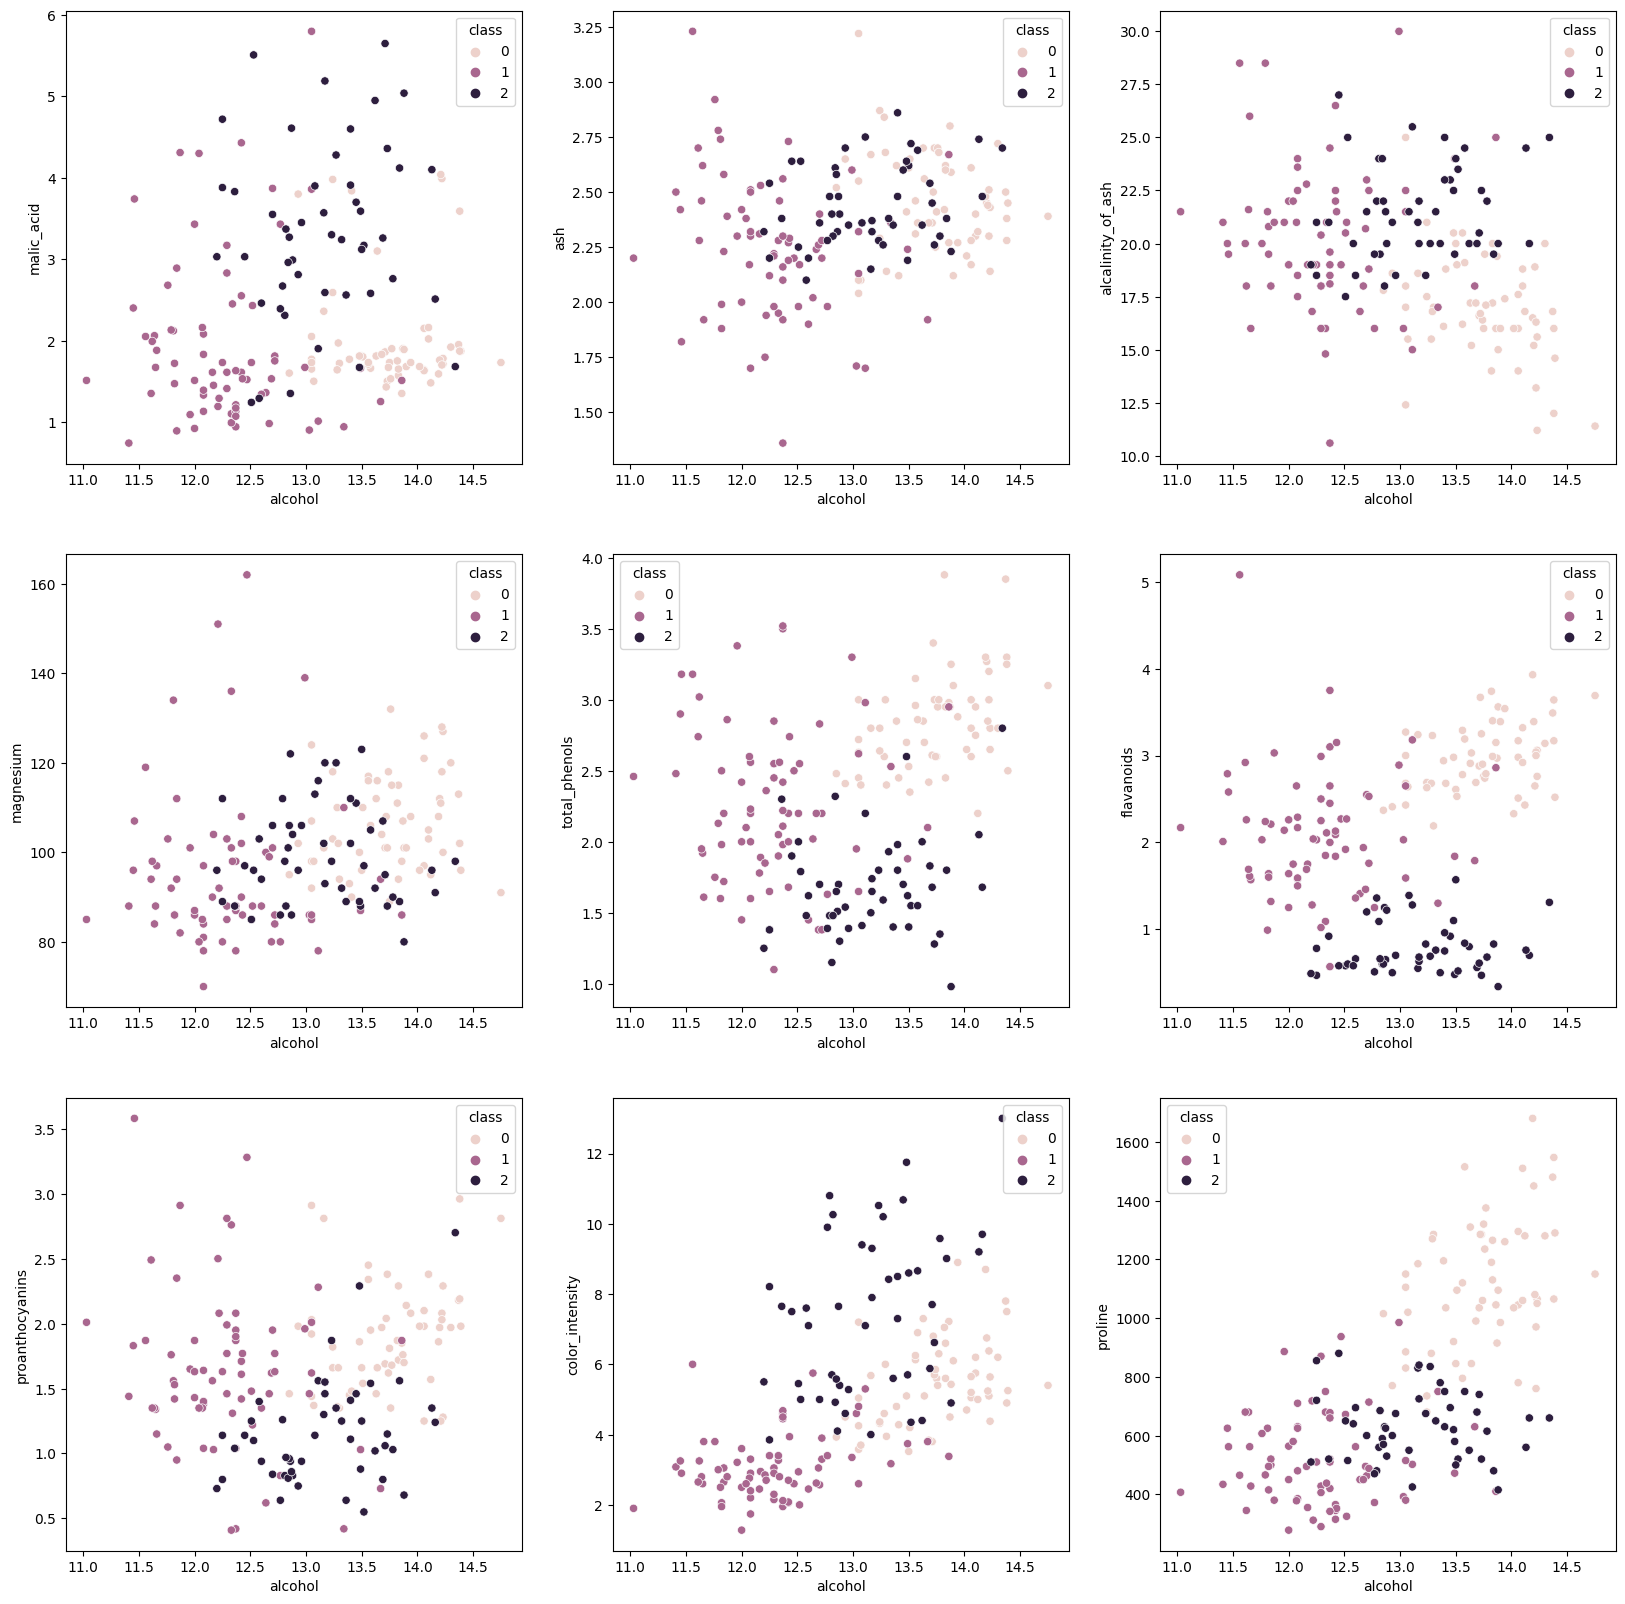

In [11]:
#alcohol을 기준으로 features에 따른 class 분포
from matplotlib import gridspec 
grid = gridspec.GridSpec(3, 3)
plt.figure(figsize=(20,20))

features = ['malic_acid','ash','alcalinity_of_ash','magnesium','total_phenols','flavanoids','proanthocyanins','color_intensity','proline']

for idx, feature in enumerate(features):
  ax = plt.subplot(grid[idx])
  sns.scatterplot(x='alcohol',y=feature,hue='class',data=wine)

### wine의 맛에 직접적으로 영향을 주는 화학 성분들 간 비교
- class별 어떠한 성분이 높은지 비교

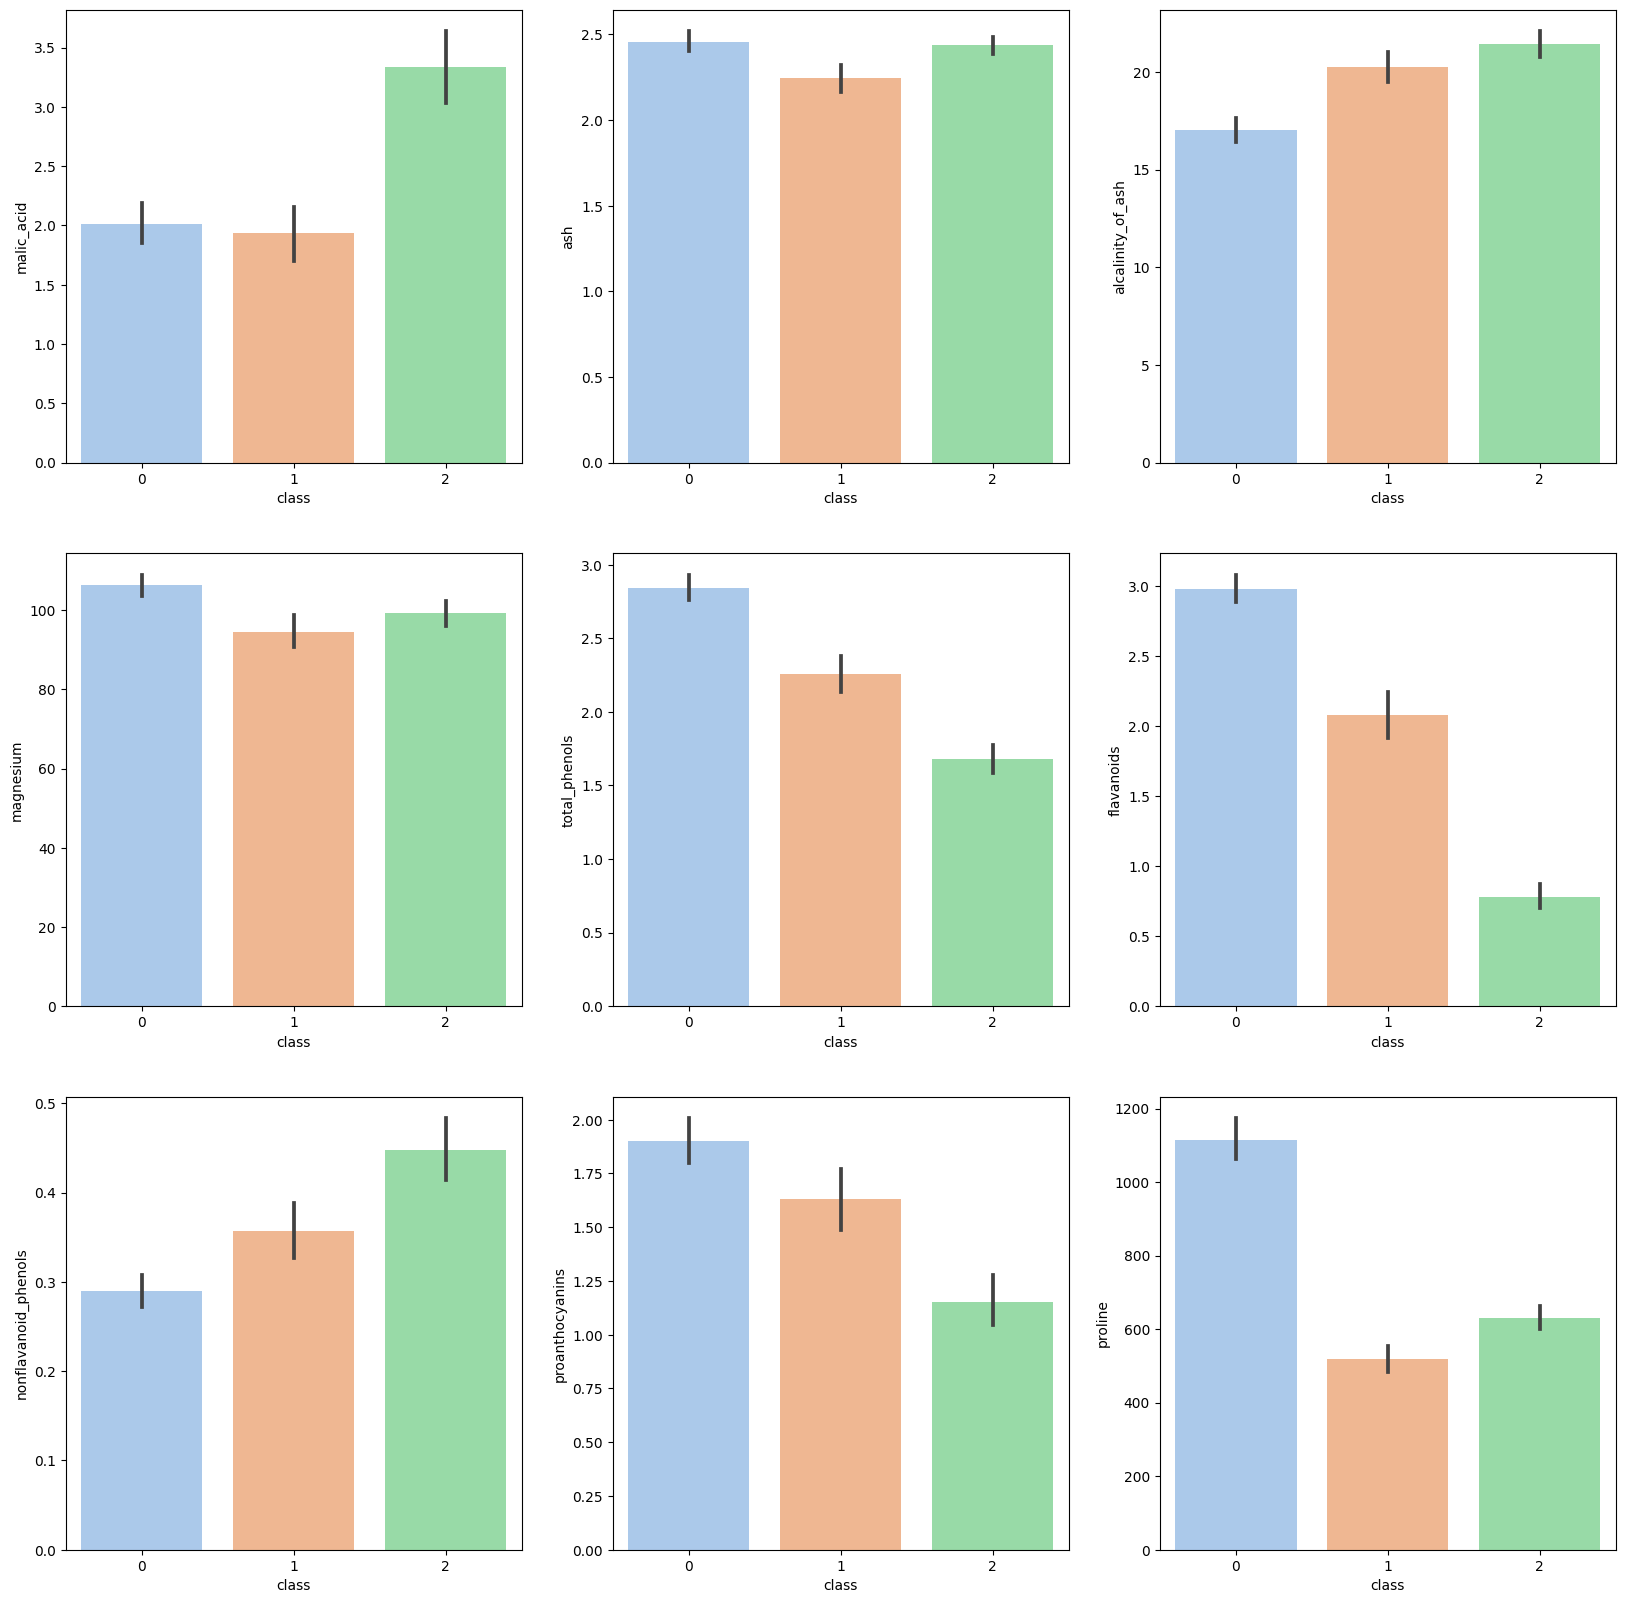

In [12]:
chemistry = ['malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'proline']

from matplotlib import gridspec 
grid = gridspec.GridSpec(3, 3)
plt.figure(figsize=(20,20))

for idx, feature in enumerate(chemistry):
  ax = plt.subplot(grid[idx])
  sns.barplot(x='class',y=feature,data=wine, palette="pastel")

- 포도의 색이 와인의 class에 영향을 미치는지 비교

<Axes: xlabel='class', ylabel='color_intensity'>

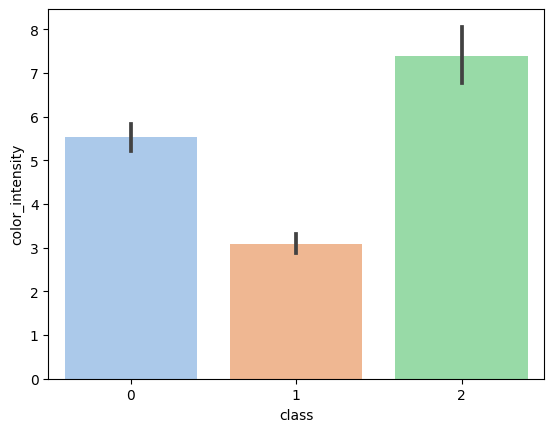

In [13]:
sns.barplot(x='class',y='color_intensity',data=wine, palette="pastel")

- od280/od315_of_diluted_wines가 class에 영향을 미친다고 했을 때, 와인 등급이 class0 > class1 > class2순이고 od280/od315_of_diluted_wines의 값이 높을 수록 와인 등급이 높다고 가정

In [15]:
wine.groupby('class')['od280/od315_of_diluted_wines'].mean()

class
0    3.157797
1    2.785352
2    1.683542
Name: od280/od315_of_diluted_wines, dtype: float64

<Axes: xlabel='class', ylabel='od280/od315_of_diluted_wines'>

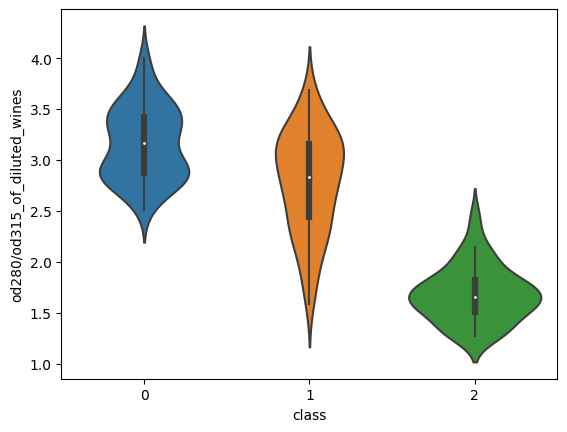

In [16]:
sns.violinplot(data=wine, x='class', y='od280/od315_of_diluted_wines')

- od280/od315_of_diluted_wines이 중요한 변수일 때, 이 변수와 다른 변수들 간의 관계 파악

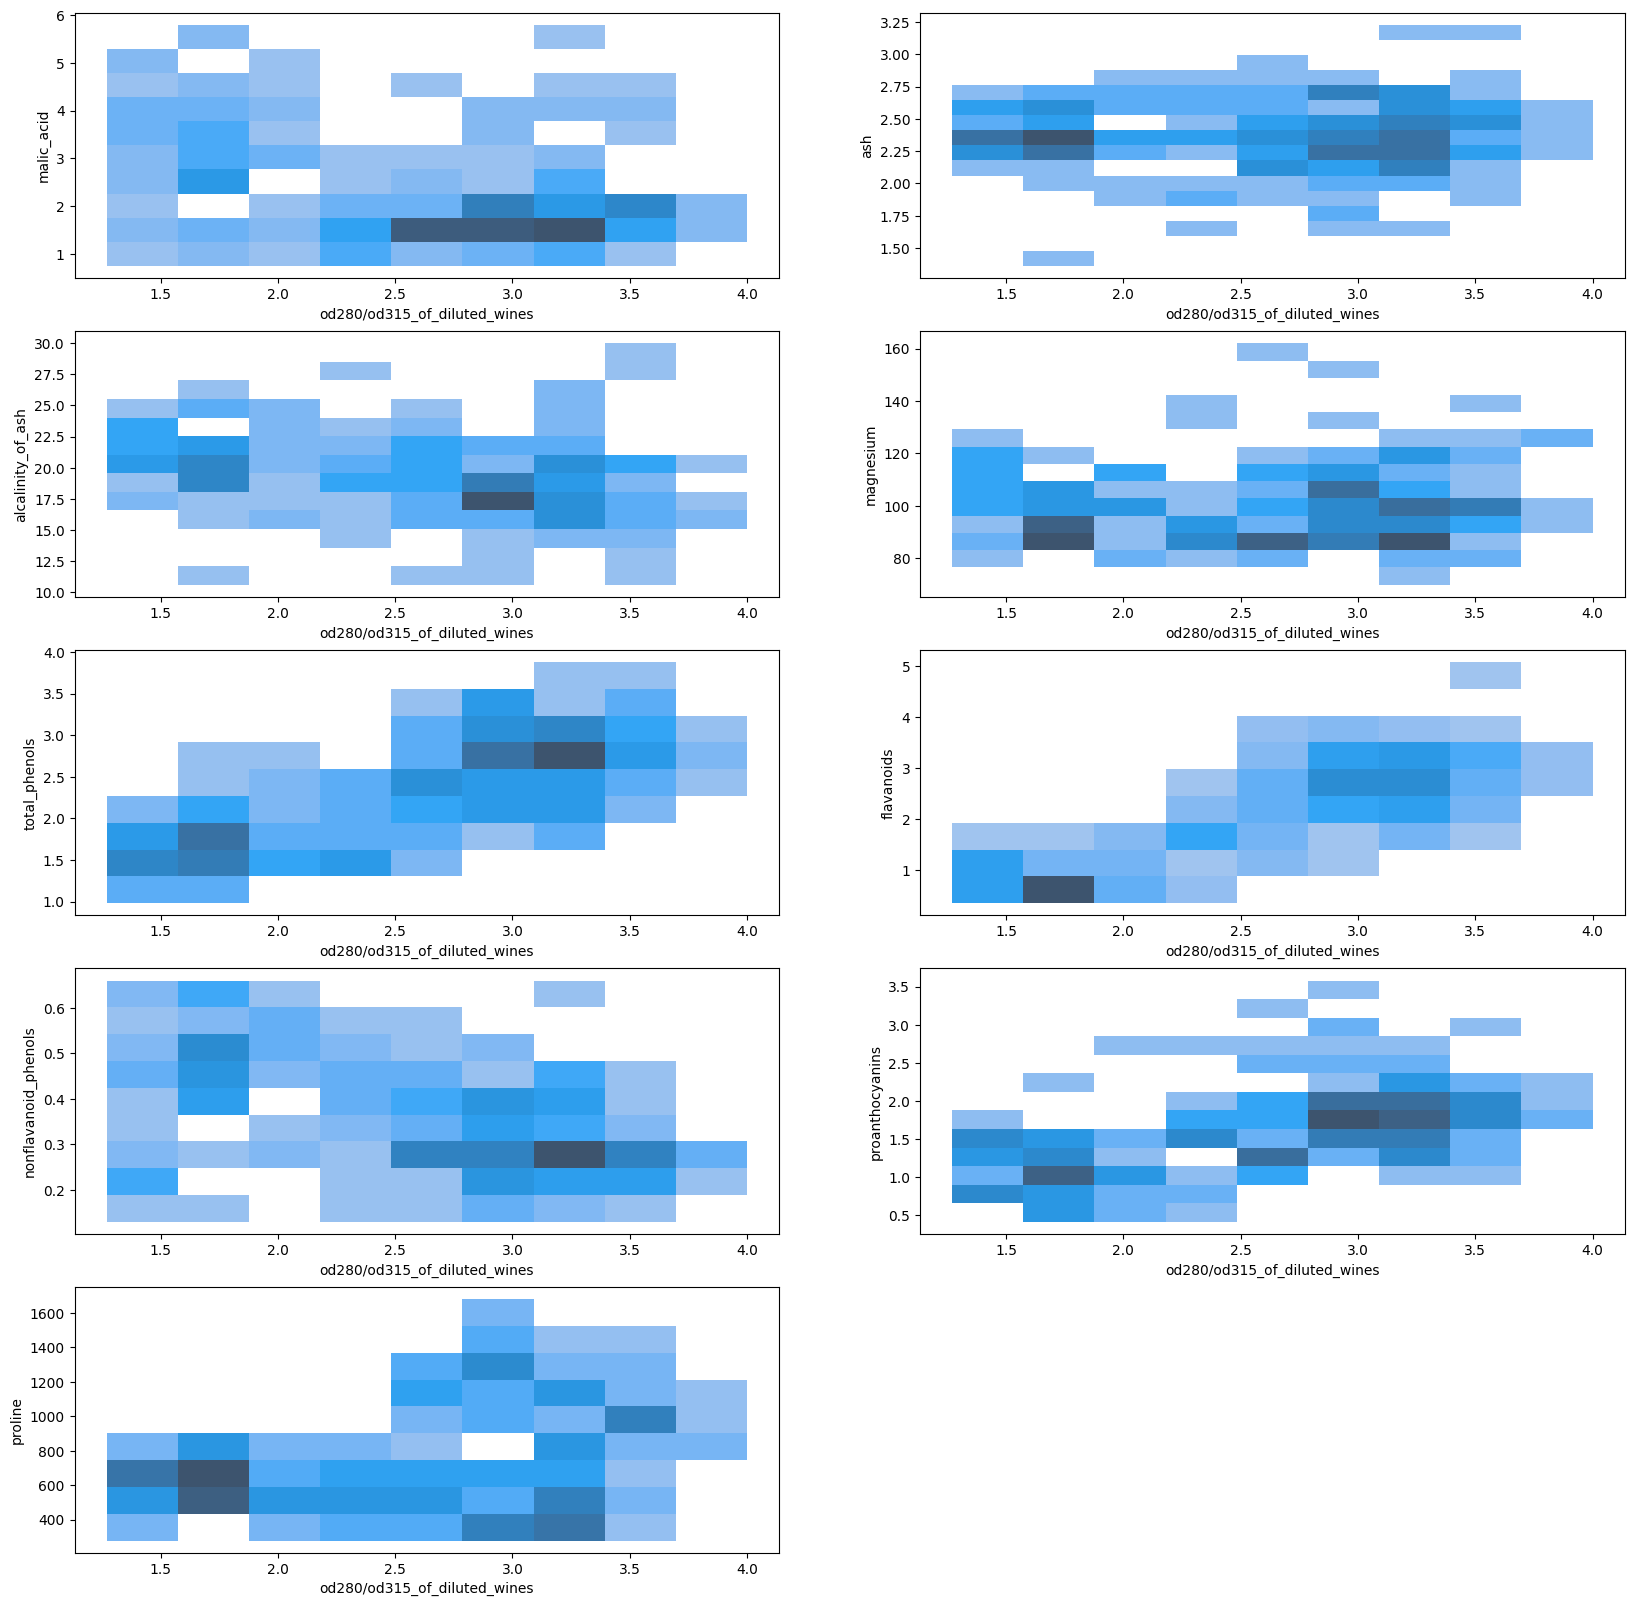

In [40]:
grid = gridspec.GridSpec(5, 2)
plt.figure(figsize=(20,20))

for idx, feature in enumerate(chemistry):
  ax = plt.subplot(grid[idx])
  sns.histplot(x='od280/od315_of_diluted_wines',y=feature,data=wine)

- 정규성 검사

In [61]:
class0 = wine[wine['class']==0]
class1 = wine[wine['class']==1]
class2 = wine[wine['class']==2]

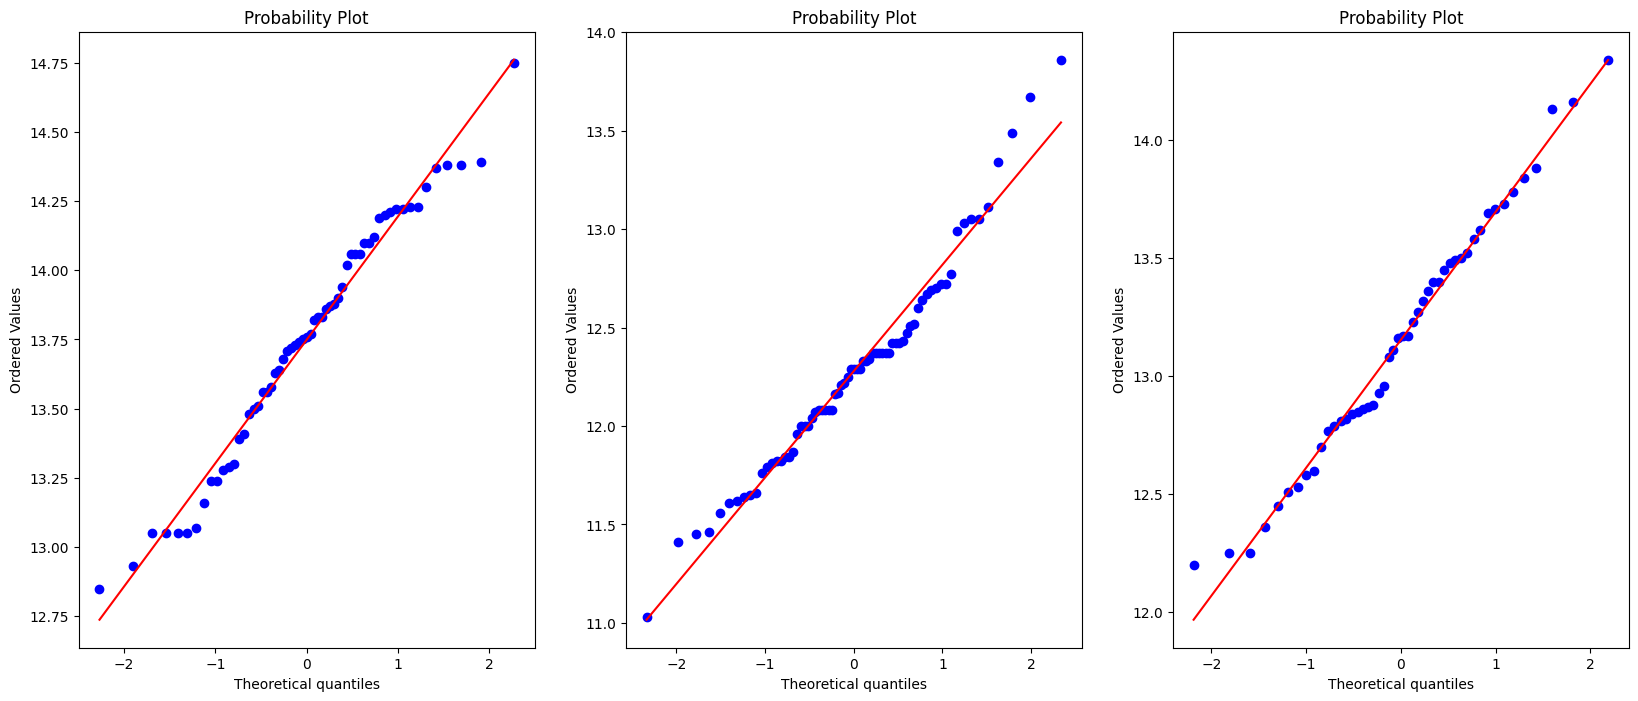

In [64]:
import scipy.stats as stats


fig = plt.figure(figsize = (20,8))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

stats.probplot(class0['alcohol'],plot =ax1)
stats.probplot(class1['alcohol'],plot =ax2)
stats.probplot(class2['alcohol'],plot =ax3)

plt.show()

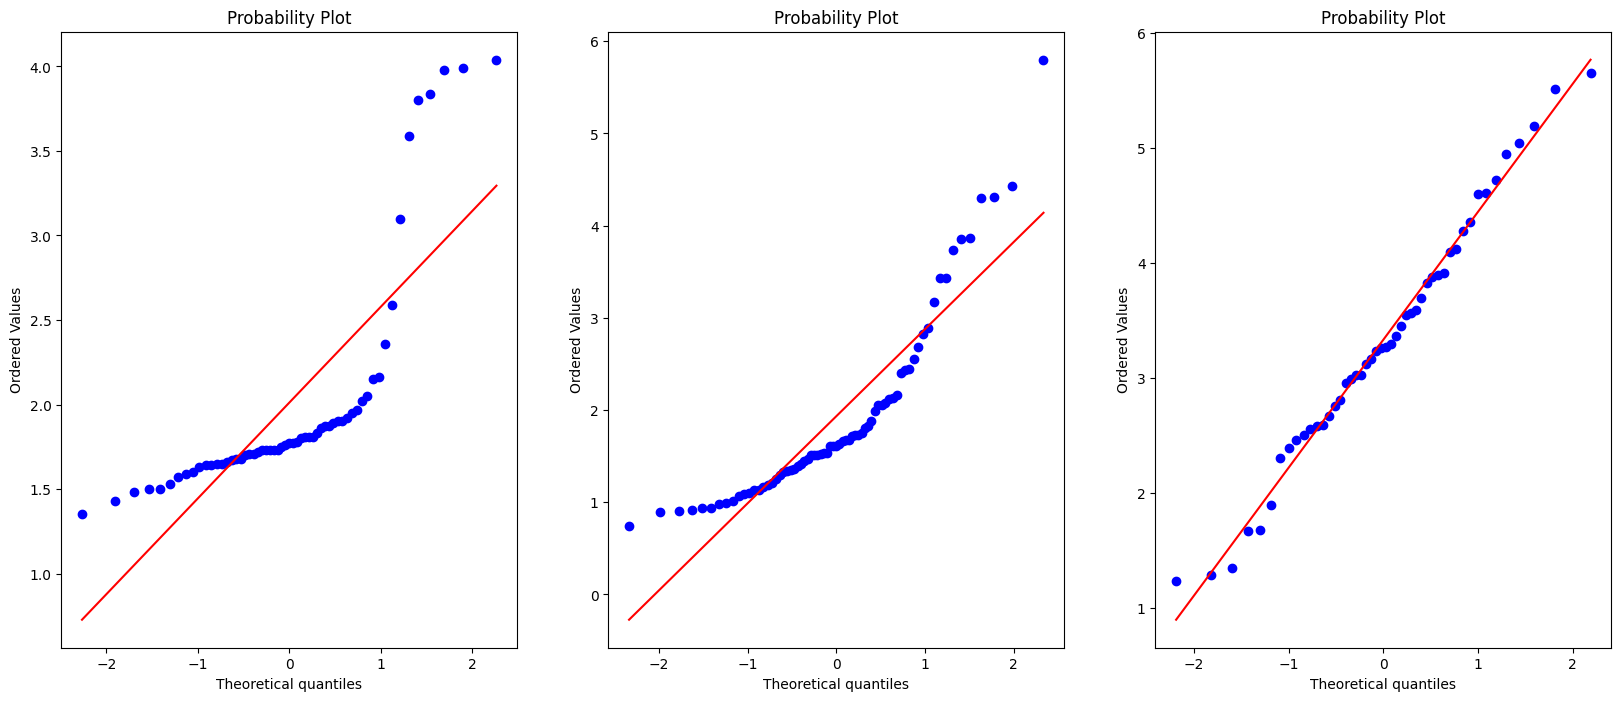

In [65]:
fig = plt.figure(figsize = (20,8))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

stats.probplot(class0['malic_acid'],plot =ax1)
stats.probplot(class1['malic_acid'],plot =ax2)
stats.probplot(class2['malic_acid'],plot =ax3)

plt.show()

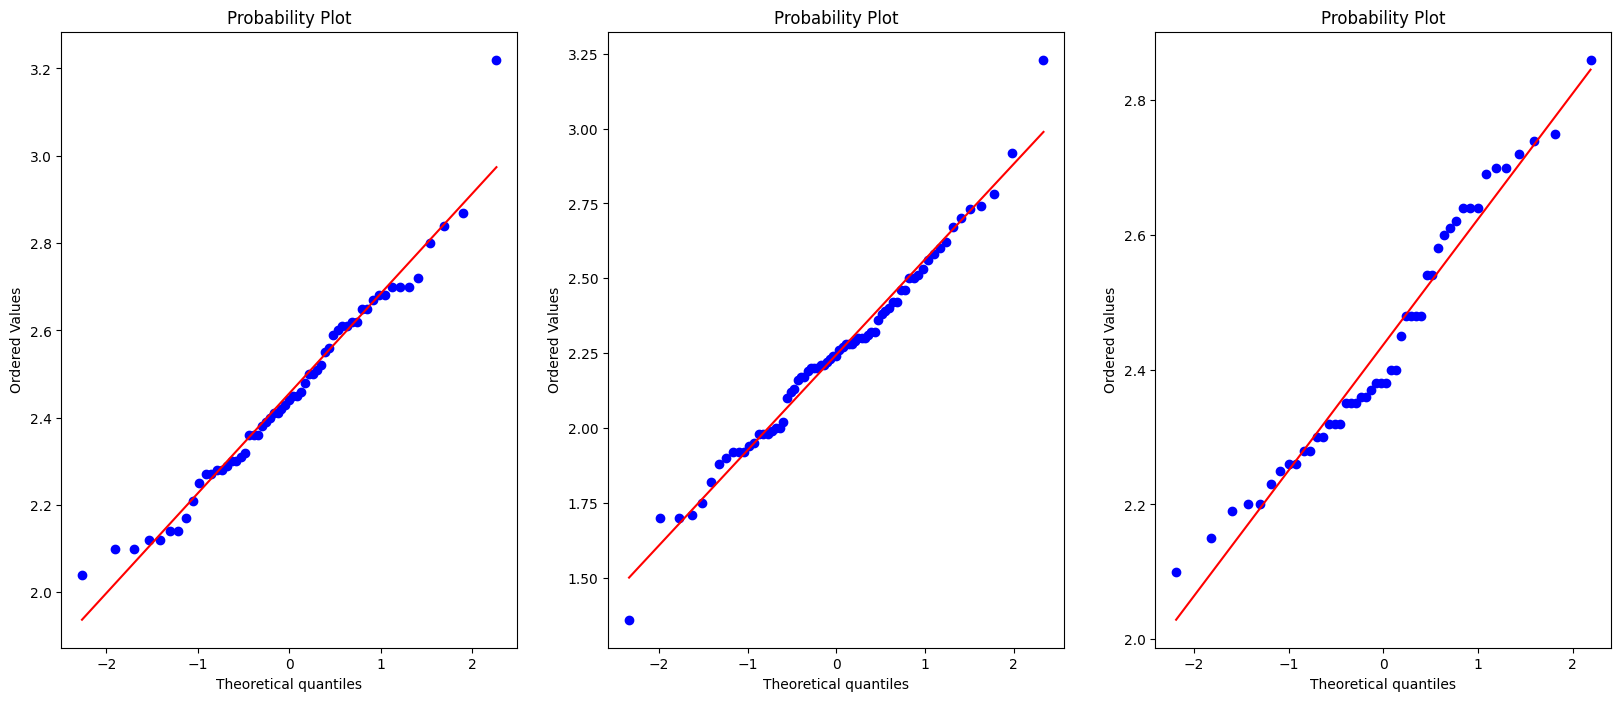

In [66]:
fig = plt.figure(figsize = (20,8))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

stats.probplot(class0['ash'],plot =ax1)
stats.probplot(class1['ash'],plot =ax2)
stats.probplot(class2['ash'],plot =ax3)

plt.show()

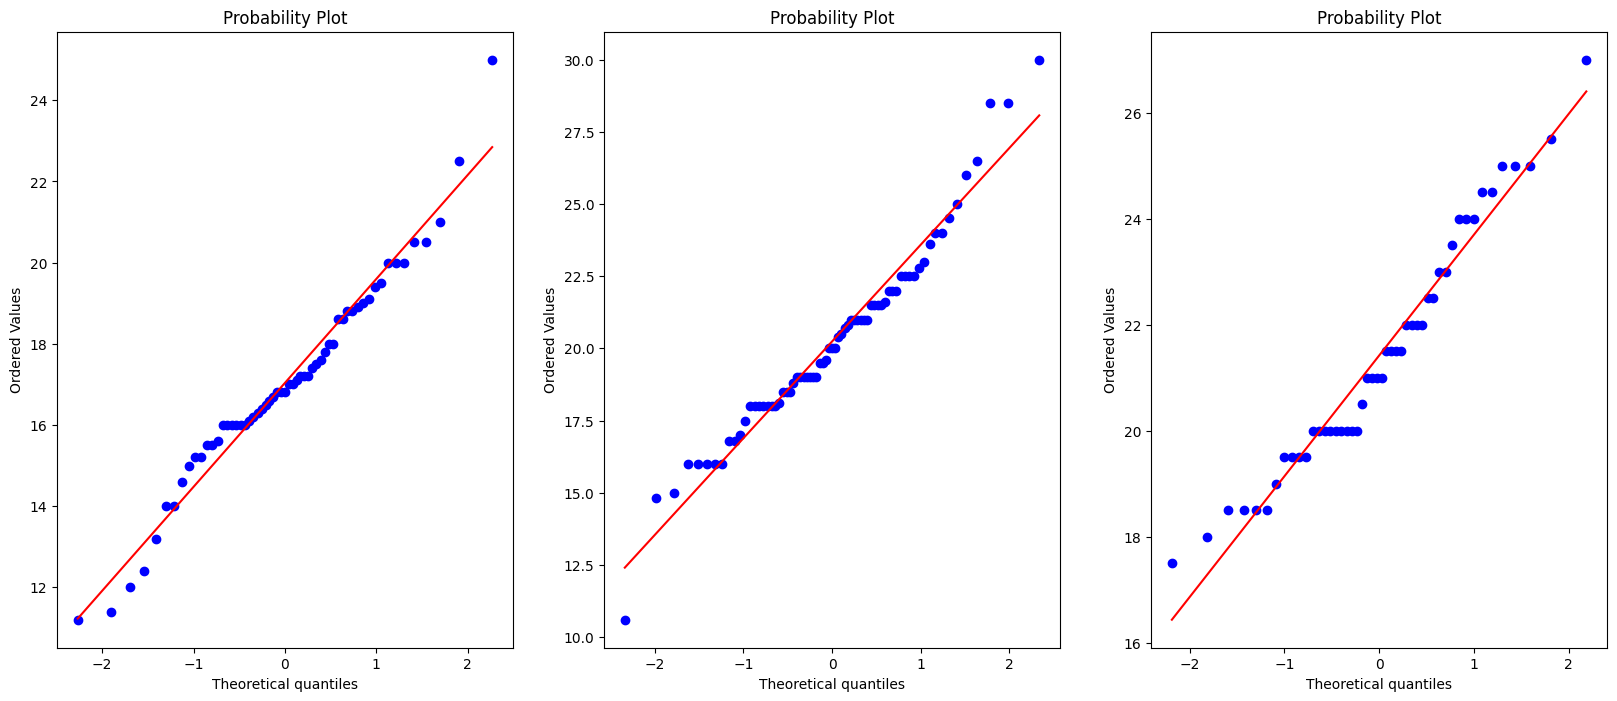

In [67]:
fig = plt.figure(figsize = (20,8))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

stats.probplot(class0['alcalinity_of_ash'],plot =ax1)
stats.probplot(class1['alcalinity_of_ash'],plot =ax2)
stats.probplot(class2['alcalinity_of_ash'],plot =ax3)

plt.show()

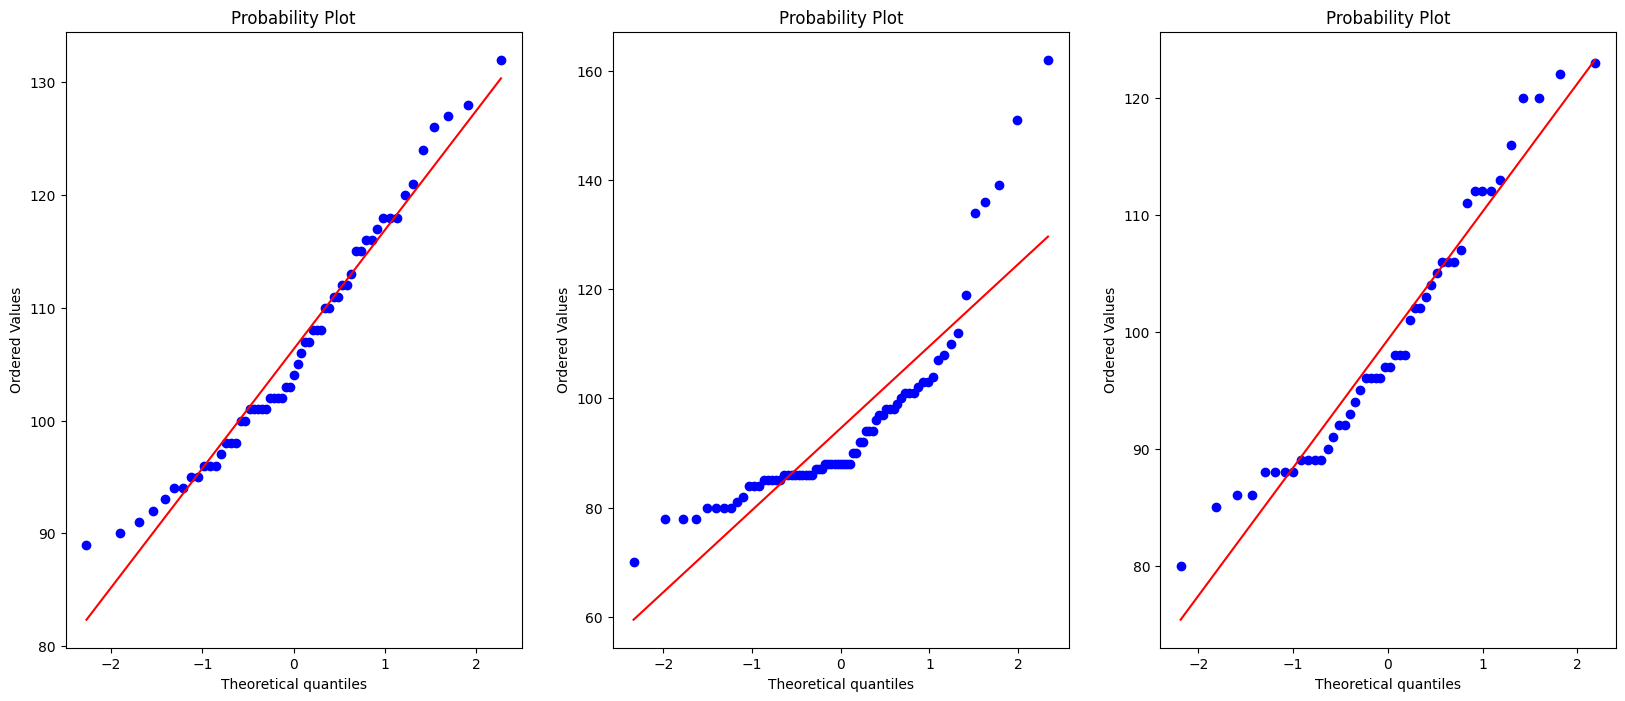

In [68]:
fig = plt.figure(figsize = (20,8))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

stats.probplot(class0['magnesium'],plot =ax1)
stats.probplot(class1['magnesium'],plot =ax2)
stats.probplot(class2['magnesium'],plot =ax3)

plt.show()

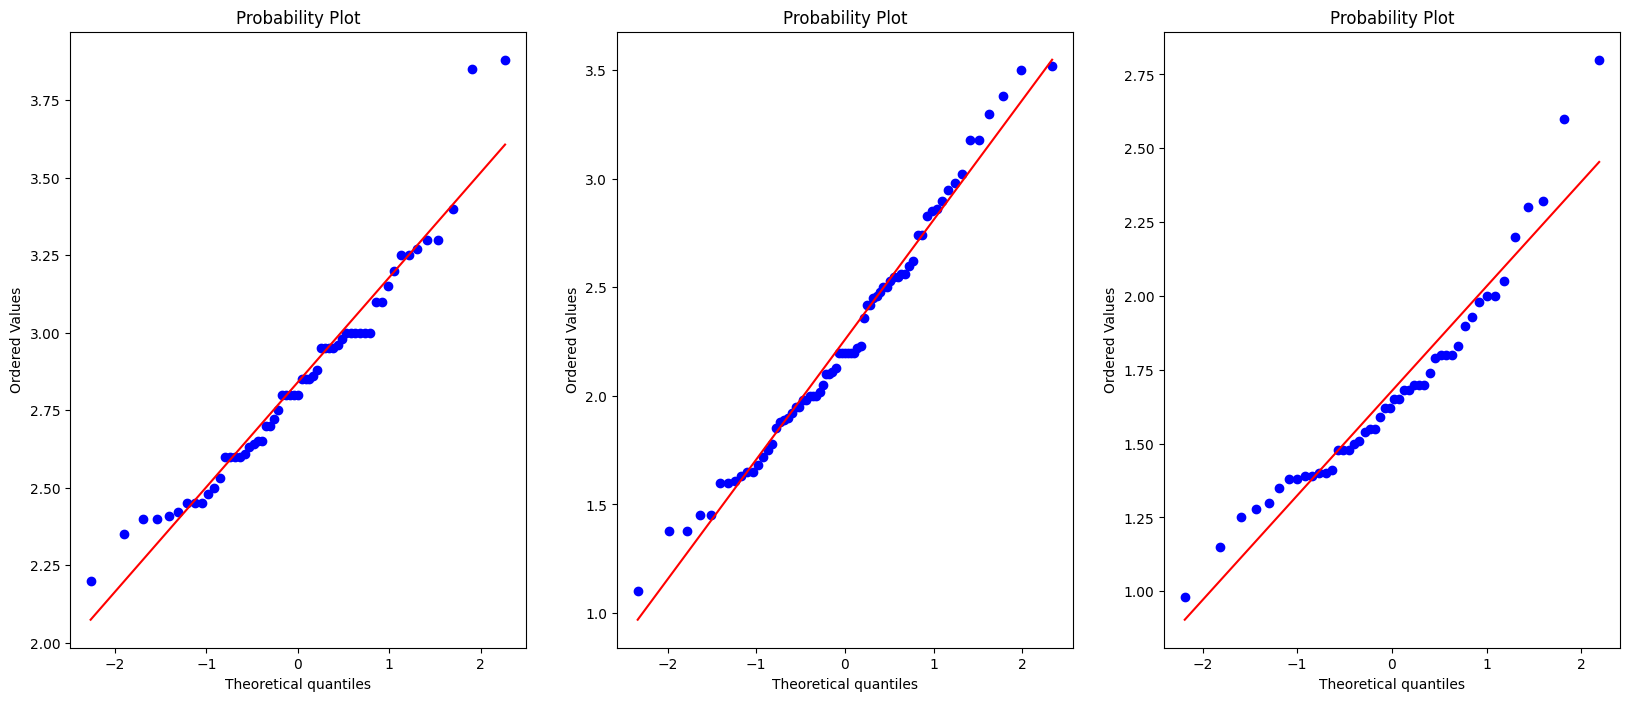

In [69]:
fig = plt.figure(figsize = (20,8))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

stats.probplot(class0['total_phenols'],plot =ax1)
stats.probplot(class1['total_phenols'],plot =ax2)
stats.probplot(class2['total_phenols'],plot =ax3)

plt.show()

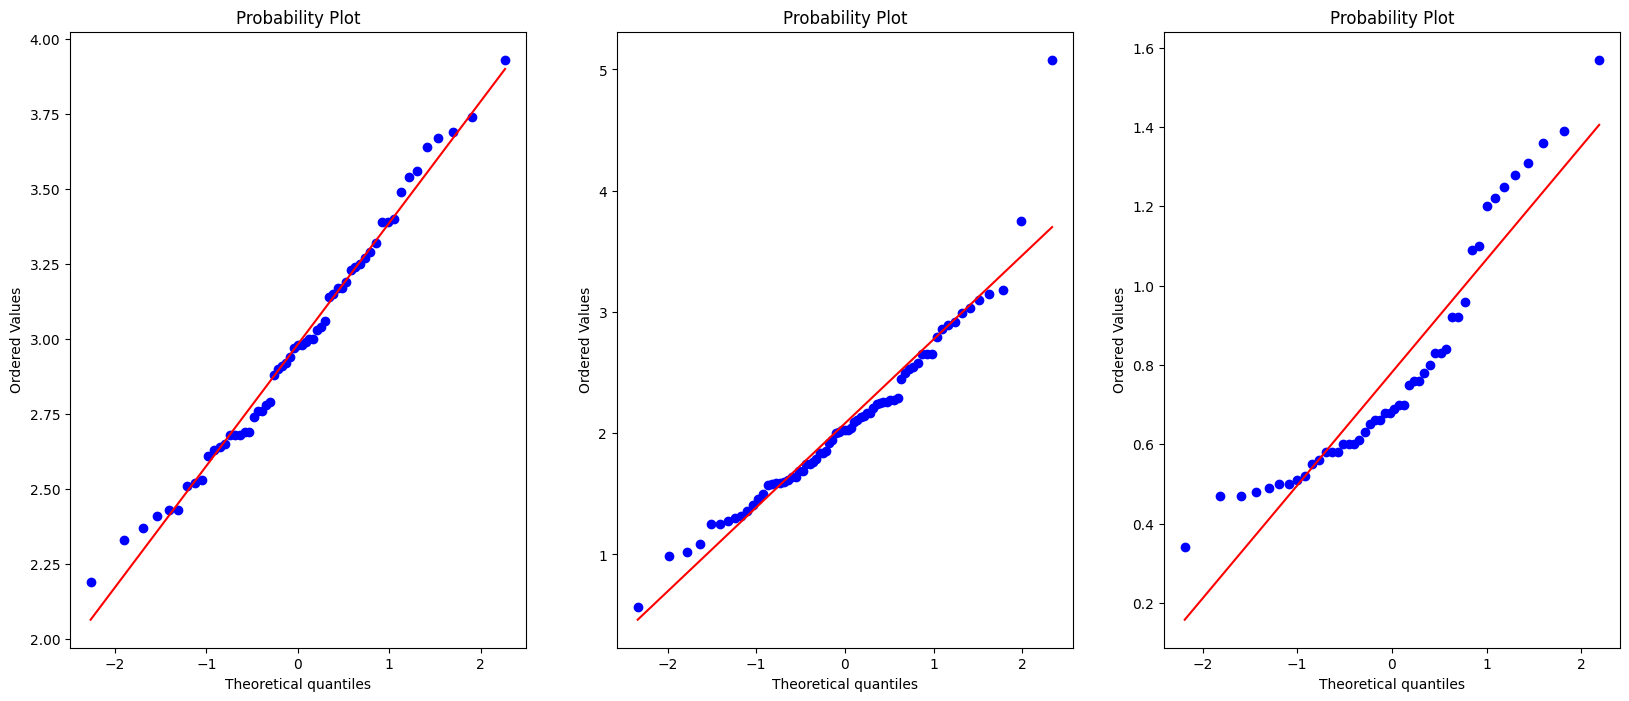

In [70]:
fig = plt.figure(figsize = (20,8))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

stats.probplot(class0['flavanoids'],plot =ax1)
stats.probplot(class1['flavanoids'],plot =ax2)
stats.probplot(class2['flavanoids'],plot =ax3)

plt.show()

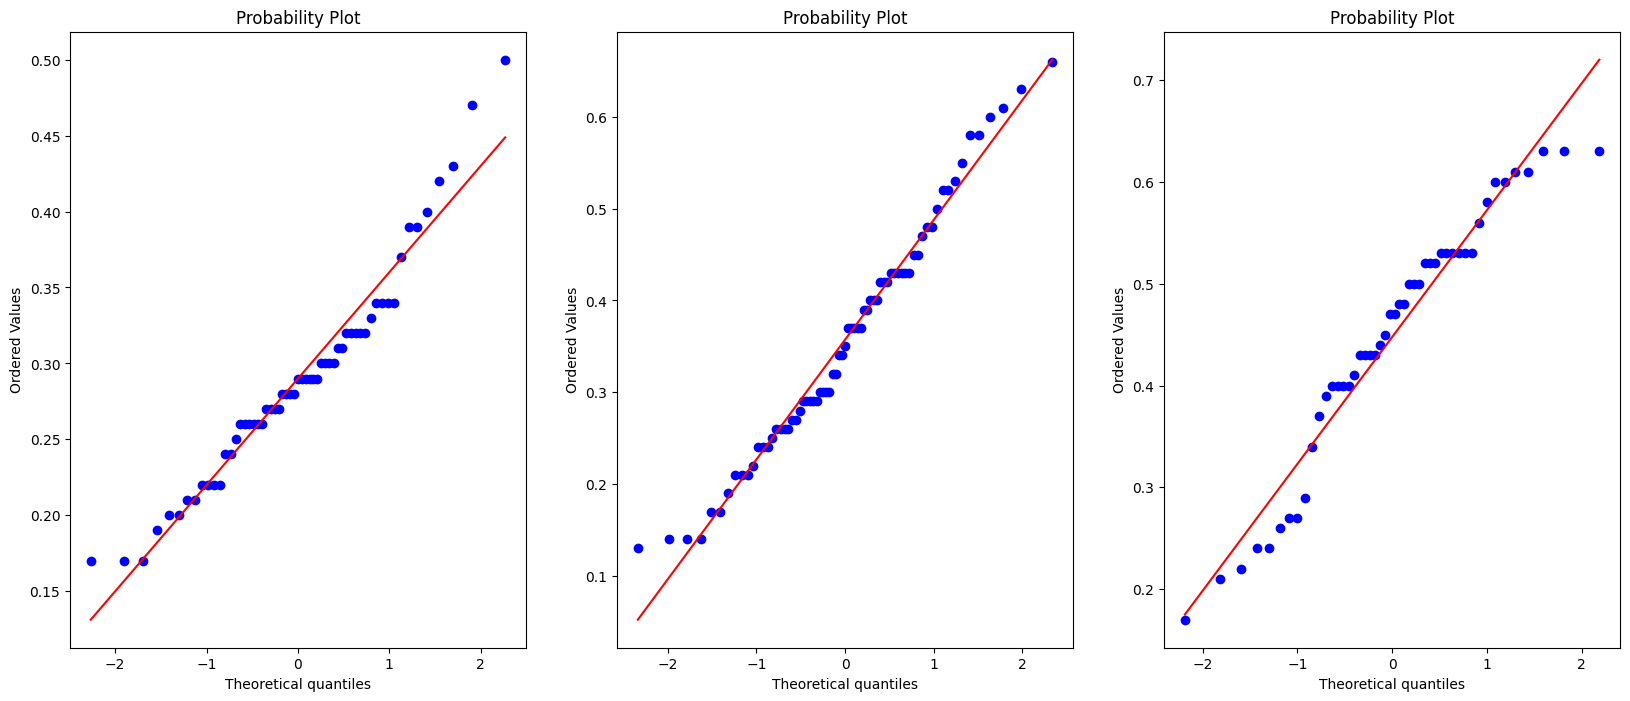

In [71]:
fig = plt.figure(figsize = (20,8))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

stats.probplot(class0['nonflavanoid_phenols'],plot =ax1)
stats.probplot(class1['nonflavanoid_phenols'],plot =ax2)
stats.probplot(class2['nonflavanoid_phenols'],plot =ax3)

plt.show()

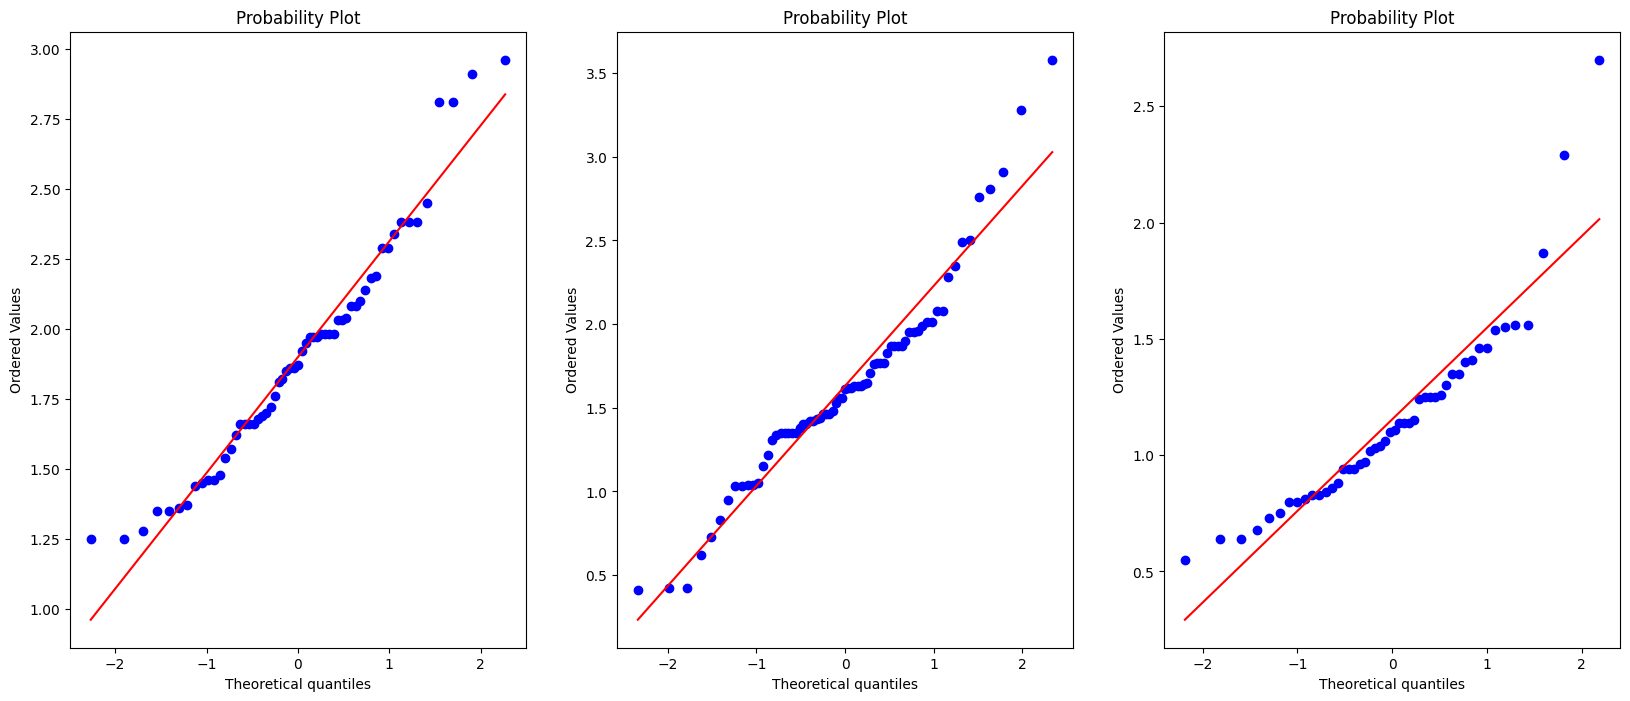

In [72]:
fig = plt.figure(figsize = (20,8))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

stats.probplot(class0['proanthocyanins'],plot =ax1)
stats.probplot(class1['proanthocyanins'],plot =ax2)
stats.probplot(class2['proanthocyanins'],plot =ax3)

plt.show()

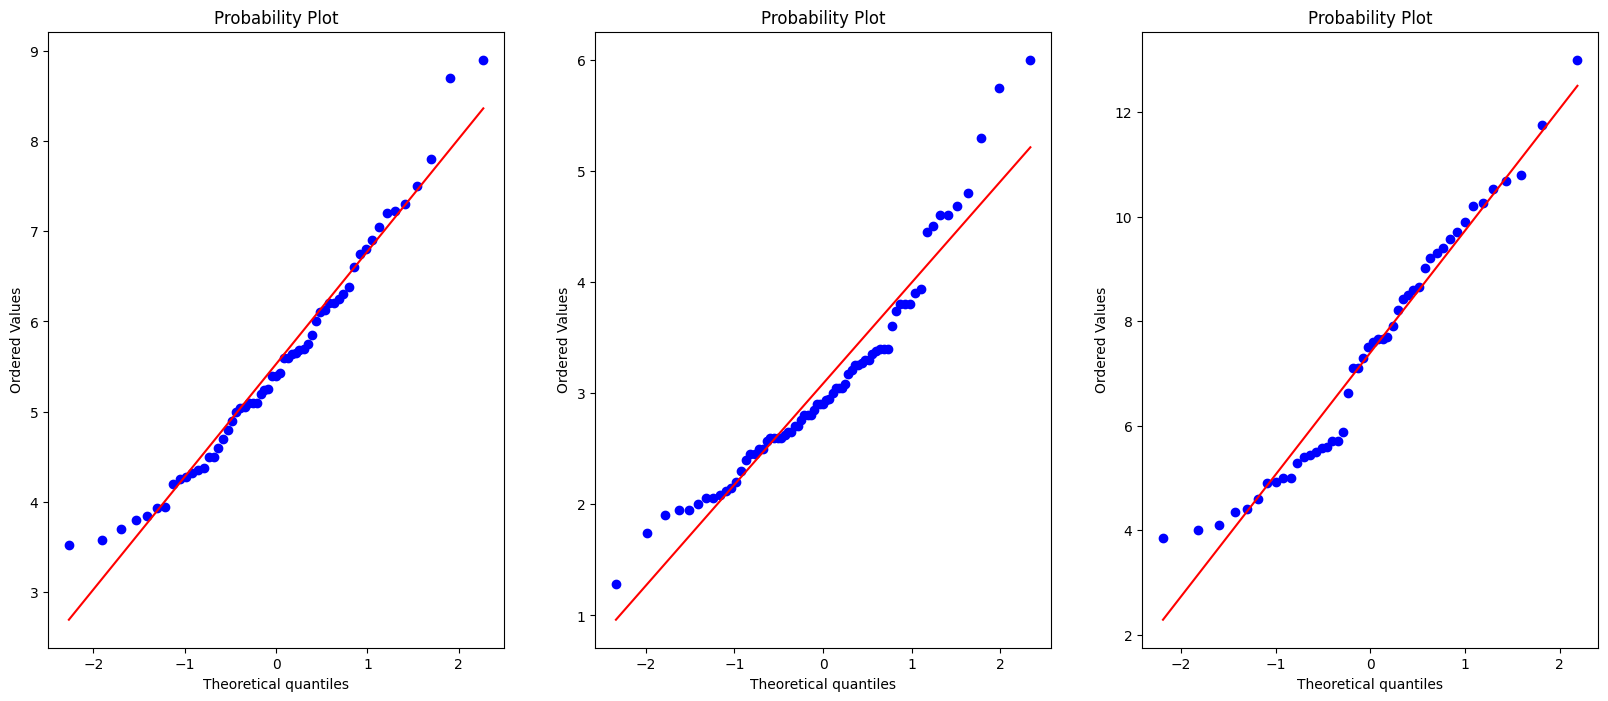

In [73]:
fig = plt.figure(figsize = (20,8))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

stats.probplot(class0['color_intensity'],plot =ax1)
stats.probplot(class1['color_intensity'],plot =ax2)
stats.probplot(class2['color_intensity'],plot =ax3)

plt.show()

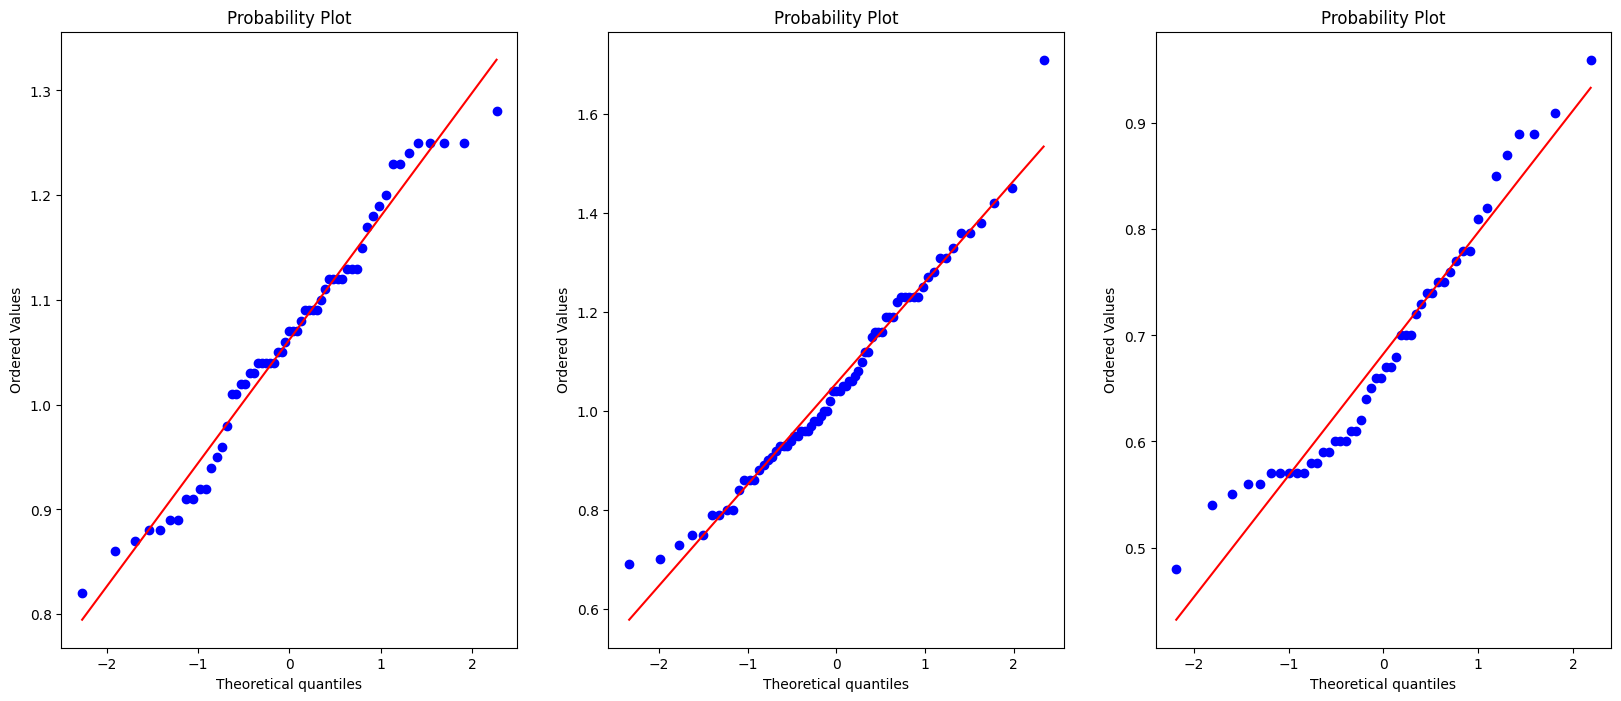

In [74]:
fig = plt.figure(figsize = (20,8))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

stats.probplot(class0['hue'],plot =ax1)
stats.probplot(class1['hue'],plot =ax2)
stats.probplot(class2['hue'],plot =ax3)

plt.show()

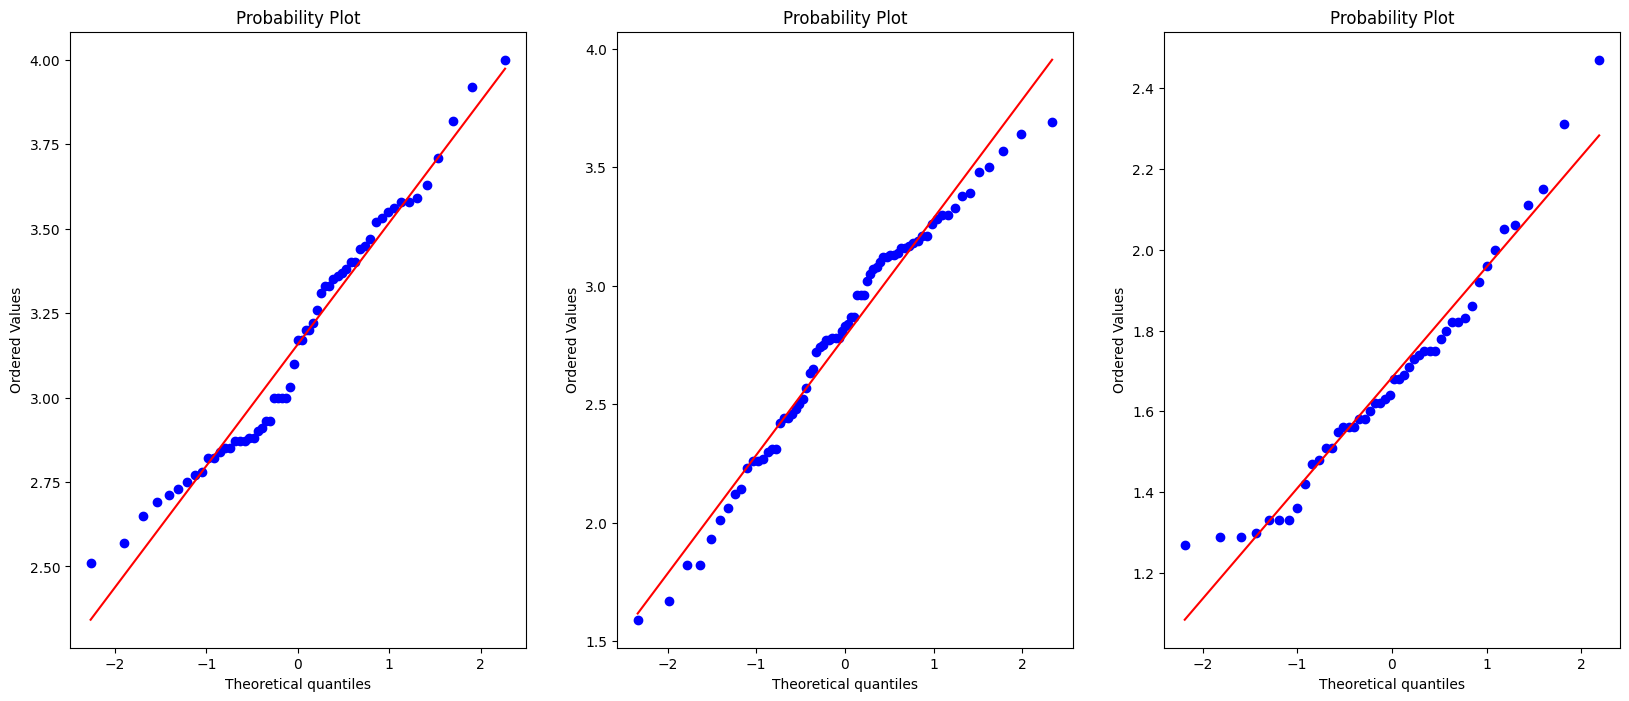

In [75]:
fig = plt.figure(figsize = (20,8))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

stats.probplot(class0['od280/od315_of_diluted_wines'],plot =ax1)
stats.probplot(class1['od280/od315_of_diluted_wines'],plot =ax2)
stats.probplot(class2['od280/od315_of_diluted_wines'],plot =ax3)

plt.show()

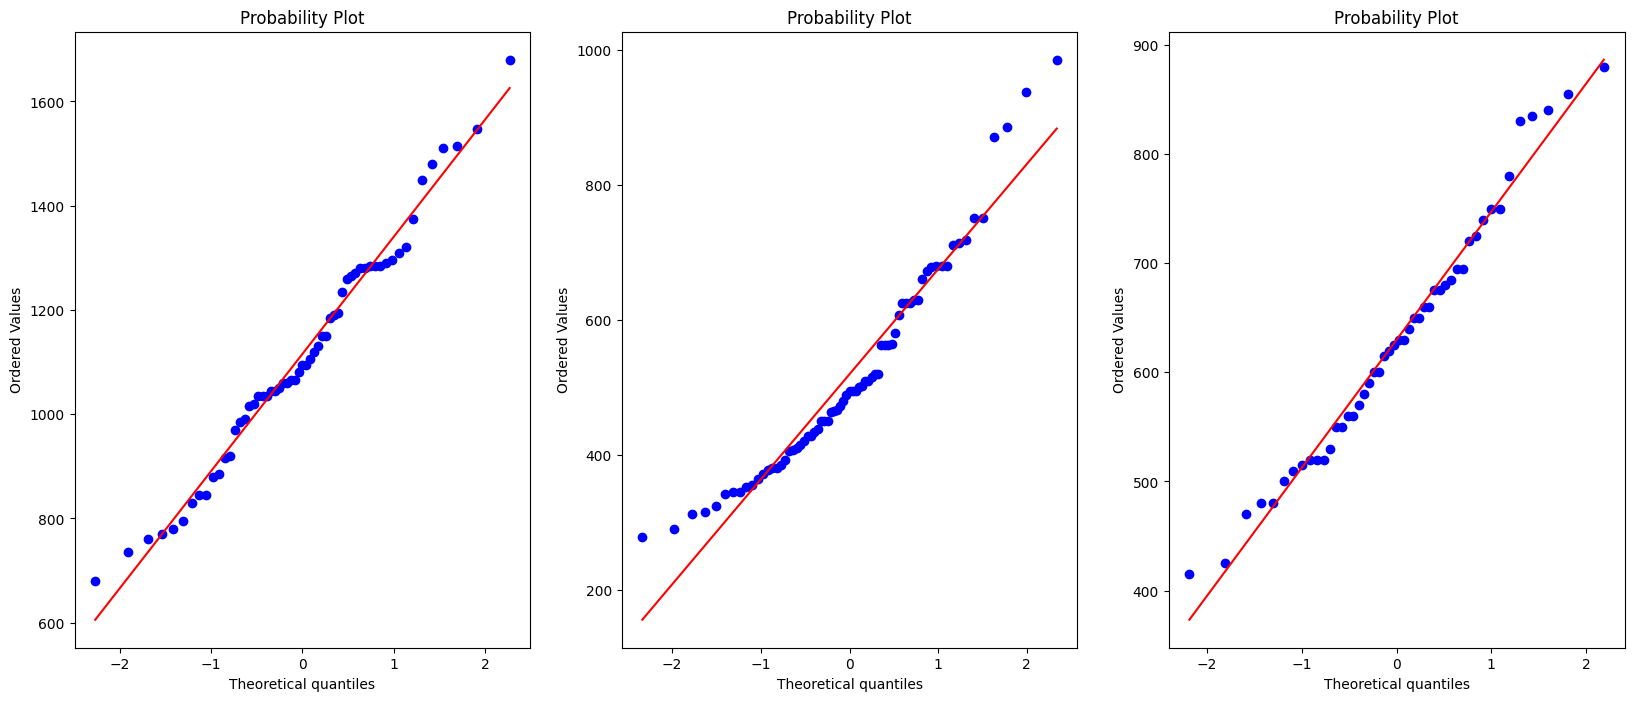

In [76]:
fig = plt.figure(figsize = (20,8))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

stats.probplot(class0['proline'],plot =ax1)
stats.probplot(class1['proline'],plot =ax2)
stats.probplot(class2['proline'],plot =ax3)

plt.show()